# FIFA World Cup 2022 Overall Tournament and Team Level Analysis

The FIFA World Cup 2022 is one of the most prestigious international football tournaments, featuring the world’s top national teams and elite players. Analyzing performance data from this tournament provides insights into overall tournament trends and team-level performance.

This project focuses on tournament context and team performance using a structured dataset that includes player demographics, playing time, attacking and defensive statistics, discipline records, and goalkeeping metrics. It incorporates traditional metrics such as goals, assists, and clean sheets, as well as derived efficiency metrics like shot accuracy, goal conversion rate, and goal contribution.

The dataset was collected from FBref, a recognized football statistics platform, and contains 680 player records across approximately 18 columns, providing comprehensive coverage of player-level data to support tournament-wide and team-level analysis.

Objectives:

Tournament overall_overview and trend:

Provide a macro-level view of the tournament, including squad composition, player age distribution, positional breakdown, and minutes played.

Examine overall offensive and defensive trends and highlight standout performers.

Team-level Analysis:

Evaluate team performance across squad composition, offensive output, defensive effort, and discipline.

Identify top-performing teams in attack, defense, and overall efficiency.


### Dataset Column Definitions
- **player_name**: Name of the player  
- **position**: Player’s primary playing position (DF = Defender, MF = Midfielder, FW = Forward, GK = Goalkeeper)  
- **team**: National team the player represents  
- **age**: Age of the player in years  
- **matches_played**: Number of matches the player appeared in  
- **minutes_played**: Total minutes played in the tournament  
- **goals**: Total goals scored by the player  
- **assists**: Total assists provided by the player
- **shots**: Total shots attempted by the player  
- **shots_on_target**: Number of shots on target  
- **tackles**: Total number of tackles made  
- **interceptions**: Number of times the player intercepted the ball  
- **blocks**: Number of shots or crosses blocked by the player  
- **yellow_card**: Number of yellow cards received  
- **red_cards**: Number of red cards received  
- **goals_against**: Total goals conceded (goalkeepers only)  
- **total_saves**: Total saves made (goalkeepers only)  
- **clean_sheets**: Number of matches where the goalkeeper or team conceded 0 goals


# Data Loading and Initial Overview
This section focuses on loading the FIFA World Cup 2022 dataset and performing an initial inspection to understand its structure, size, data types, and basic statistical properties. This step ensures familiarity with the dataset before proceeding to cleaning and analysis.

The initial overview includes:

- Checking the number of rows and columns to understand dataset size.
- Inspecting data types and non-null counts to identify potential issues.
- Viewing basic statistical summaries for numerical columns.
- Displaying the first and last few rows to get a sense of the data.

In [152]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tabulate as tabulate
from matplotlib.ticker import MaxNLocator

 

In [153]:
# file Reading
file_path = r'C:\Users\user\Downloads\projecyt\project_csv.xlsx'

df = pd.read_excel(file_path, sheet_name='Data_Set', header=0, index_col=None,na_filter=False)

pd.set_option('display.max_columns', None) # Display all columns




In [154]:
# Number of rows and columns
print("Number of rows and columns:", df.shape, '\n')

Number of rows and columns: (680, 18) 



In [155]:
# Data types and non-null counts of each column
print("Data types and non-null counts of each column:\n", df.info(), '\n')
 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player_Name      680 non-null    object
 1   Position         680 non-null    object
 2   Team             680 non-null    object
 3   Age              680 non-null    int64 
 4   Matches_Played   680 non-null    int64 
 5   Minutes_Played   680 non-null    int64 
 6   Goals            680 non-null    int64 
 7   Assits           680 non-null    int64 
 8   Shots            680 non-null    int64 
 9   Shots_on_Target  680 non-null    int64 
 10  Tackles          680 non-null    int64 
 11  Interceptions    680 non-null    int64 
 12  Blocks           680 non-null    int64 
 13  Yellow Cards     680 non-null    int64 
 14  Red Cards        680 non-null    int64 
 15  Goals Against    680 non-null    int64 
 16  Total Saves      680 non-null    int64 
 17  Clean Sheets     680 non-null    in

In [156]:
# Statistical overview of numerical columns
df.describe()

,Age,Matches_Played,Minutes_Played,Goals,Assits,Shots,Shots_on_Target,Tackles,Interceptions,Blocks,Yellow Cards,Red Cards,Goals Against,Total Saves,Clean Sheets
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,26.586765,2.933824,191.194118,0.250000,0.177941,2.107353,0.705882,3.047059,1.569118,2.113235,0.332353,0.005882,0.260294,0.483824,0.058824
std,4.161129,1.520611,147.774808,0.698726,0.487652,3.031781,1.337780,3.547385,2.081814,2.370747,0.565175,0.076527,1.208053,2.354397,0.333781
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,3.000000,173.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,4.000000,270.000000,0.000000,0.000000,3.000000,1.000000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,7.000000,690.000000,8.000000,3.000000,29.000000,13.000000,26.000000,14.000000,13.000000,3.000000,1.000000,11.000000,24.000000,3.000000


In [157]:
# Display first 5 rows
df.head()

,Player_Name,Position,Team,Age,Matches_Played,Minutes_Played,Goals,Assits,Shots,Shots_on_Target,Tackles,Interceptions,Blocks,Yellow Cards,Red Cards,Goals Against,Total Saves,Clean Sheets
0,Brenden Aaronson,MF,us United States,21,4,108,0,0,1,0,3,1,5,0,0,0,0,0
1,Ali Abdi,DF,tn Tunisia,28,3,188,0,0,0,0,8,4,1,1,0,0,0,0
2,Salis Abdul Samed,MF,gh Ghana,22,3,250,0,0,1,0,2,4,2,0,0,0,0,0
3,Saud Abdulhamid,DF,sa Saudi Arabia,22,3,270,0,0,1,0,5,2,3,1,0,0,0,0
4,Nawaf Al Abed,MF,sa Saudi Arabia,32,2,88,0,0,2,0,0,1,0,1,0,0,0,0


In [158]:
# # Display last 5 rows
df.tail()

,Player_Name,Position,Team,Age,Matches_Played,Minutes_Played,Goals,Assits,Shots,Shots_on_Target,Tackles,Interceptions,Blocks,Yellow Cards,Red Cards,Goals Against,Total Saves,Clean Sheets
675,Walker Zimmerman,DF,us United States,29,4,279,0,0,1,0,3,4,4,0,0,0,0,0
676,Andrija Živković,DF,rs Serbia,25,3,210,0,2,1,0,5,3,5,0,0,0,0,0
677,Hakim Ziyech,FW,ma Morocco,29,7,635,1,1,10,2,10,10,10,0,0,0,0,0
678,Filip Đuričić,MF,rs Serbia,30,2,14,0,0,0,0,0,0,0,0,0,0,0,0
679,Lawrence Ati-Zigi,GK,gh Ghana,25,3,270,0,0,0,0,0,0,0,0,0,7,10,0


#  Data Pre-processing  
This section focuses on cleaning the FIFA World Cup 2022 dataset and creating derived metrics to prepare for analysis. The steps ensure the data is accurate, consistent, and ready for both player-level and team-level evaluation.

### Missing Values and Duplicate Records

The dataset was examined for missing values and duplicate records to ensure data quality and integrity. Identifying and addressing such issues is essential before performing any analysis or aggregation.



In [159]:
# Check for missing values and duplicates
print("Missing values per column:")
print(df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())

Missing values per column:
Player_Name        0
Position           0
Team               0
Age                0
Matches_Played     0
Minutes_Played     0
Goals              0
Assits             0
Shots              0
Shots_on_Target    0
Tackles            0
Interceptions      0
Blocks             0
Yellow Cards       0
Red Cards          0
Goals Against      0
Total Saves        0
Clean Sheets       0
dtype: int64
Number of duplicate rows: 0


The inspection confirmed that the dataset contains no missing values and no duplicate rows, indicating that the data is complete and ready for further processing.

### Column Name Standardization

Column names were standardized by converting them to lowercase, removing extra spaces, and replacing special characters with underscores. This ensures consistency, improves readability, and avoids errors during aggregation, visualization, and feature engineering.

Additionally, a typo in one of the column names was corrected to maintain naming accuracy.

In [160]:
# Rename specific columns to fix typos
df.rename(columns={'Assits': 'assists'}, inplace=True)

In [161]:
# Standardize all column names
df.columns=(df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_'))

### Categorical Data Cleaning

Text-based categorical variables were cleaned to remove formatting inconsistencies:

Player names were standardized by removing extra spaces and non-breaking characters.

Positions were simplified by extracting the primary playing position for each player.

Team names were cleaned by removing country codes and retaining only the team name.

These steps ensure uniform categories and reliable grouping during analysis.

In [162]:
# Clean 'player_name' column
df['player_name'] = (df['player_name'].astype(str).str.replace('\u00a0', ' ', regex=False).str.strip().str.replace(r'\s+', ' ', regex=True))


In [163]:
# Clean 'position' column and extract primary position
df['position'] = (df['position'].astype(str).str.strip().str.upper().str.split(',').str[0])# Take primary position only
df['position'] = df['position'].astype('category')
print("Position value counts:")
print(df['position'].value_counts())


Position value counts:
position
DF    229
MF    226
FW    184
GK     41
Name: count, dtype: int64


In [164]:
# Clean 'team' column: remove country codes and extra spaces
df['team']=(df['team'].astype(str).str.replace('\u00a0', ' ', regex=False).str.strip().str.split(r'\s+', n=1).str[1]) # Keep the team name after the country code
df['team'] = df['team'].astype('category')
print("Team value counts:")
print(df['team'].value_counts())


Team value counts:
team
Brazil            26
Morocco           25
France            24
Argentina         24
Portugal          24
Switzerland       24
Saudi Arabia      23
Costa Rica        22
Japan             22
Cameroon          22
Serbia            22
Mexico            21
Korea Republic    21
Netherlands       21
Croatia           21
IR Iran           21
Spain             21
Poland            21
Tunisia           21
Germany           20
Denmark           20
Australia         20
Belgium           20
Ghana             20
Senegal           20
United States     20
England           20
Qatar             20
Uruguay           19
Canada            19
Ecuador           18
Wales             18
Name: count, dtype: int64


### Feature Engineering and Derived Metrics
To evaluate player and team performance more effectively, several derived metrics were created from the raw statistics. These metrics provide deeper insights into efficiency, contribution, and defensive involvement beyond absolute counts.

The derived metrics include:

Shot accuracy and goal conversion rate to measure scoring efficiency

Defensive actions to quantify defensive involvement

Discipline and goalkeeping workload indicators

Some performance metrics involve division, such as shots or matches played in the denominator. To avoid invalid calculations and division-by-zero errors, conditional logic was applied while creating these metrics.

Shot accuracy and goal conversion rate were calculated only for players who attempted at least one shot. If a player had zero shots, the value was set to zero.

Goals conceded per match was calculated only for players who played at least one match. If matches played were zero, the value was set to zero.

All other derived metrics are based on addition or subtraction and therefore do not require conditional checks.
This approach ensures that efficiency metrics are meaningful and that the dataset remains clean and reliable for further analysis.

In [165]:
#derived column
df['shot_accuracy'] = np.where(df['shots'] > 0,df['shots_on_target'] / df['shots'],0) 
df['goal_conversion_rate'] = np.where(df['shots_on_target'] > 0,df['goals'] / df['shots_on_target'],0)
df['goal_contribution'] = df['goals'] + df['assists']
df['defensive_actions'] = df['tackles'] + df['interceptions'] + df['blocks']
df['total_cards'] = df['yellow_cards'] + df['red_cards']
df['shots_on_target_faced'] = df['total_saves']+df['goals_against']



###  Team-Level Aggregated Metrics
To evaluate overall team performance in the FIFA World Cup 2022, player-level statistics were aggregated at the team level. This aggregation provides a consolidated view of each team’s attacking output, defensive contribution, discipline, and goalkeeping performance.

The aggregated metrics include:

Squad Composition: Number of players (team_players) providing insight into team size.

Attacking Performance: Total goals (team_goals), assists (team_assists), shots (team_shots), and shots on target (team_shots_on_target), summarizing overall offensive output.

Defensive Contribution: Total defensive actions (team_defensive_actions) and goals conceded (team_goals_against), quantifying team defensive effectiveness.

Discipline: Total cards (team_total_cards) across all players, representing the team’s overall discipline record.

Goalkeeping Performance: Total saves (team_total_saves) and clean sheets (team_clean_sheets)”, and clean sheets (clean_sheets) aggregated from goalkeepers only to avoid double counting, reflecting matches where the team conceded no goals.

Goal Contributions: Calculated as the sum of goals and assists across all players (team_goal_contributions), representing the total attacking impact of the team.

Goalkeeping metrics were aggregated exclusively from players in the goalkeeper position to avoid double counting and to ensure accurate representation of goalkeeper performance.

Aggregating player-level data in this manner ensures that team-level metrics remain accurate, interpretable, and aligned with the project objectives, supporting a comprehensive evaluation of team performance across attacking, defensive, disciplinary, and goalkeeping dimensions.


In [166]:
team_summary = df.groupby('team').agg(
    team_players=('player_name', 'nunique'),
    team_goals=('goals', 'sum'),
    team_assists=('assists', 'sum'), 
    team_shots=('shots', 'sum'),
    team_shots_on_target=('shots_on_target', 'sum'),
    team_defensive_actions=('defensive_actions', 'sum'),
    team_yellow_cards=('yellow_cards','sum'),
    team_red_cards=('red_cards','sum'),
    team_total_cards=('total_cards', 'sum')
).reset_index()

team_summary['team_goal_contributions'] = team_summary['team_goals'] + team_summary['team_assists']

# Aggregate goalkeeper-specific metrics
goalkeepers = df[df['position'] == 'GK']

team_gk_metrics = goalkeepers.groupby('team').agg(
    team_goals_against=('goals_against', 'sum'),             
    team_total_saves=('total_saves', 'sum'),
    team_total_shots_faced=('shots_on_target_faced', 'sum'),                
    team_clean_sheets=('clean_sheets', 'sum')                    
).reset_index()

# Merge GK metrics with overall team metrics
team_summary = team_summary.merge(team_gk_metrics, on='team', how='left')

# Fill missing values for teams with no goalkeepers (if any)
team_summary[['team_goals_against', 'team_total_saves','team_clean_sheets']] = \
 team_summary[['team_goals_against', 'team_total_saves','team_clean_sheets']].fillna(0)

# Display the corrected team summary
team_summary

C:\Users\user\AppData\Local\Temp\ipykernel_6804\4089161192.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_6804\4089161192.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,team,team_players,team_goals,team_assists,team_shots,team_shots_on_target,team_defensive_actions,team_yellow_cards,team_red_cards,team_total_cards,team_goal_contributions,team_goals_against,team_total_saves,team_total_shots_faced,team_clean_sheets
0,Argentina,24,15,8,95,41,259,17,0,17,23,8,6,14,3
1,Australia,20,3,3,26,8,162,7,0,7,6,6,12,18,2
2,Belgium,20,1,1,35,9,98,5,0,5,2,2,8,10,2
3,Brazil,26,8,6,95,40,188,6,0,6,14,3,7,10,2
4,Cameroon,22,4,4,28,16,104,8,1,9,8,4,11,15,1
5,Canada,19,1,1,34,4,85,8,0,8,2,7,8,15,0
6,Costa Rica,22,3,1,12,7,140,6,0,6,4,11,11,22,1
7,Croatia,21,8,8,79,26,262,8,0,8,16,7,24,31,2
8,Denmark,20,1,1,34,10,108,5,0,5,2,3,8,11,1
9,Ecuador,18,4,2,29,10,107,3,0,3,6,3,1,4,1


### Display cleaned datasets 

In [167]:
# Player-level cleaned dataset
df

,player_name,position,team,age,matches_played,minutes_played,goals,assists,shots,shots_on_target,tackles,interceptions,blocks,yellow_cards,red_cards,goals_against,total_saves,clean_sheets,shot_accuracy,goal_conversion_rate,goal_contribution,defensive_actions,total_cards,shots_on_target_faced
0,Brenden Aaronson,MF,United States,21,4,108,0,0,1,0,3,1,5,0,0,0,0,0,0.0,0.0,0,9,0,0
1,Ali Abdi,DF,Tunisia,28,3,188,0,0,0,0,8,4,1,1,0,0,0,0,0.0,0.0,0,13,1,0
2,Salis Abdul Samed,MF,Ghana,22,3,250,0,0,1,0,2,4,2,0,0,0,0,0,0.0,0.0,0,8,0,0
3,Saud Abdulhamid,DF,Saudi Arabia,22,3,270,0,0,1,0,5,2,3,1,0,0,0,0,0.0,0.0,0,10,1,0
4,Nawaf Al Abed,MF,Saudi Arabia,32,2,88,0,0,2,0,0,1,0,1,0,0,0,0,0.0,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Walker Zimmerman,DF,United States,29,4,279,0,0,1,0,3,4,4,0,0,0,0,0,0.0,0.0,0,11,0,0
676,Andrija Živković,DF,Serbia,25,3,210,0,2,1,0,5,3,5,0,0,0,0,0,0.0,0.0,2,13,0,0
677,Hakim Ziyech,FW,Morocco,29,7,635,1,1,10,2,10,10,10,0,0,0,0,0,0.2,0.5,2,30,0,0
678,Filip Đuričić,MF,Serbia,30,2,14,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0


In [168]:
# Aggregated team-level dataset
team_summary

,team,team_players,team_goals,team_assists,team_shots,team_shots_on_target,team_defensive_actions,team_yellow_cards,team_red_cards,team_total_cards,team_goal_contributions,team_goals_against,team_total_saves,team_total_shots_faced,team_clean_sheets
0,Argentina,24,15,8,95,41,259,17,0,17,23,8,6,14,3
1,Australia,20,3,3,26,8,162,7,0,7,6,6,12,18,2
2,Belgium,20,1,1,35,9,98,5,0,5,2,2,8,10,2
3,Brazil,26,8,6,95,40,188,6,0,6,14,3,7,10,2
4,Cameroon,22,4,4,28,16,104,8,1,9,8,4,11,15,1
5,Canada,19,1,1,34,4,85,8,0,8,2,7,8,15,0
6,Costa Rica,22,3,1,12,7,140,6,0,6,4,11,11,22,1
7,Croatia,21,8,8,79,26,262,8,0,8,16,7,24,31,2
8,Denmark,20,1,1,34,10,108,5,0,5,2,3,8,11,1
9,Ecuador,18,4,2,29,10,107,3,0,3,6,3,1,4,1


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is used to understand the structure, quality, and overall characteristics of the dataset before performing detailed analysis. In this project, EDA is conducted after data cleaning and preparation to ensure that insights are accurate, reliable, and well-supported.

The analysis focuses on tournament-level patterns and team-level performance using a combination of descriptive statistics and visual exploration. Key aspects examined include player participation, demographics, playing time, and positional structure, as well as team offensive output, defensive effort, and discipline. Derived efficiency metrics such as goal contribution, goal conversion rate, defensive efficiency, and clean sheets are incorporated to provide deeper performance insights.

A range of visualizations—bar charts, histograms, box plots, scatter plots, heatmaps, and subplots—are used throughout the analysis to clearly communicate patterns, comparisons, and relationships within the data.

---

## Structure of the EDA

The analysis is organized into two main sections:

---

## Dataset Overview (Descriptive)

This section provides an initial understanding of the dataset’s structure, size, and content. It focuses on descriptive statistics, metadata inspection, and basic performance metrics to ensure data quality and readiness for deeper analysis.

It covers:

- Dataset dimensions (rows, columns) and feature types

- Missing values and data completeness

- Summary statistics for numerical variables (age, minutes played, goals, assists, etc.)


## Tournament Overview & Trend Analysis

This section provides a macro-level view of the tournament and establishes overall context before moving into team-wise comparisons.

It covers:

- Overall tournament summary (teams, players, goals, assists, and cards)
- Player demographics, including age distribution and experience
- Position-wise player distribution (DF, MF, FW, GK)
- Playing time and workload distribution (minutes played)
- Overall attacking,defensive and discipline trends at the tournament level
- Correlation analysis using a heatmap to examine relationships between:
  - Goals
  - Assists
  - Goal contributions
  - Minutes played
  - Matches played
  - Defensive actions
  - Clean sheets
  - Total cards

This section sets the foundation for understanding how the tournament unfolded at a high level.

---

## Team-Level Analysis

This section aggregates player-level data at the team level to evaluate overall team performance, balance, and effectiveness.

It includes:

- Identification of top-performing teams based on goal contributions, defensive actions, and clean sheets
- Evaluation of offensive efficiency through goals vs shots on target and goal conversion rate
- Assessment of defensive effort and effectiveness using defensive actions, clean sheets, and goals conceded
- Analysis of team discipline using total, yellow, and red cards to understand differences in playing style and control

Together, these analyses provide a comprehensive view of how teams balanced attack, defense, and discipline throughout the tournament.

## Analytical Approach

The following analysis techniques are applied throughout the EDA:
- **Univariate analysis** to study the distribution of individual variables  
- **Bivariate analysis** to explore relationships between key performance metrics  
- **Multivariate analysis** to understand combined effects and correlations  

---

## Dataset Overview (Descriptive)

This section provides an initial understanding of the dataset structure, size, and basic characteristics using descriptive statistics and metadata inspection.

The following methods are used:
- `df.shape` to understand dataset size  
- `df.info()` to check data types and missing values  
- `df.describe()` to summarize numerical variables  
  

In [169]:
# # Check the number of rows and columns
print(df.shape)




(680, 24)


In [170]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   player_name            680 non-null    object  
 1   position               680 non-null    category
 2   team                   680 non-null    category
 3   age                    680 non-null    int64   
 4   matches_played         680 non-null    int64   
 5   minutes_played         680 non-null    int64   
 6   goals                  680 non-null    int64   
 7   assists                680 non-null    int64   
 8   shots                  680 non-null    int64   
 9   shots_on_target        680 non-null    int64   
 10  tackles                680 non-null    int64   
 11  interceptions          680 non-null    int64   
 12  blocks                 680 non-null    int64   
 13  yellow_cards           680 non-null    int64   
 14  red_cards              680 non-null    int

In [171]:
# Summary statistics for numerical columns
df.describe()

,age,matches_played,minutes_played,goals,assists,shots,shots_on_target,tackles,interceptions,blocks,yellow_cards,red_cards,goals_against,total_saves,clean_sheets,shot_accuracy,goal_conversion_rate,goal_contribution,defensive_actions,total_cards,shots_on_target_faced
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,26.586765,2.933824,191.194118,0.250000,0.177941,2.107353,0.705882,3.047059,1.569118,2.113235,0.332353,0.005882,0.260294,0.483824,0.058824,0.192340,0.120538,0.427941,6.729412,0.338235,0.744118
std,4.161129,1.520611,147.774808,0.698726,0.487652,3.031781,1.337780,3.547385,2.081814,2.370747,0.565175,0.076527,1.208053,2.354397,0.333781,0.305074,0.299048,0.969695,6.837716,0.582269,3.450785
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,26.000000,3.000000,173.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,29.000000,4.000000,270.000000,0.000000,0.000000,3.000000,1.000000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,10.000000,1.000000,0.000000
max,39.000000,7.000000,690.000000,8.000000,3.000000,29.000000,13.000000,26.000000,14.000000,13.000000,3.000000,1.000000,11.000000,24.000000,3.000000,1.000000,2.000000,10.000000,42.000000,3.000000,31.000000


#### Key Insights:

The dataset contains 680 players and 24 features, with no missing values, confirming it is clean and ready for analysis.

Each row corresponds to a player-level record, covering 32 teams participating in the tournament.

Player ages range from 17 to 39 years, with an average of 26.6 years, showing a balance of youth and experience.

Minutes played vary widely, from 1 to 690 minutes, reflecting differences between regular starters and substitutes.

Derived performance metrics such as shot accuracy, goal conversion rate, goal contribution, defensive actions, and total cards are included, supporting efficiency-based analysis.

This dataset is ready for univariate, bivariate, and multivariate analysis at player, team, and tournament levels.

## Tournament Overview & Trend Analysis
This section examines the tournament at a macro level, aggregating player- and team-level data to identify key patterns and trends. It covers squad composition, player demographics, positional distribution, playing time, overall attacking and defensive output, and discipline metrics. The section also highlights top performers and uses correlation analysis to reveal relationships among key performance metrics. Together, these analyses provide a high-level view of tournament dynamics and set the foundation for team-level comparisons.

### Tournament-Level Summary:
This section summarizes the scale and activity of the tournament. It highlights the number of teams and players, average age, playing time, total goals and assists, and overall disciplinary record, giving a quick snapshot of participation, attacking output, and on-field behavior.

In [172]:
# Tournament_Overview
# This table establishes the scale, participation, and intensity of the tournament.
tournament_overview=[]
tournament_overview.append({
    'total_teams': df['team'].nunique(),
    'total_players': df['player_name'].nunique(),
    'average_age': df['age'].mean(),
    'average_minutes_played': df['minutes_played'].mean(),
    'total_goals': df['goals'].sum(),
    'total_assists': df['assists'].sum(),
    'total_cards': df['total_cards'].sum()
})

print(tabulate.tabulate(tournament_overview, headers='keys', tablefmt='pretty'))

+-------------+---------------+--------------------+------------------------+-------------+---------------+-------------+
| total_teams | total_players |    average_age     | average_minutes_played | total_goals | total_assists | total_cards |
+-------------+---------------+--------------------+------------------------+-------------+---------------+-------------+
|     32      |      680      | 26.586764705882352 |   191.19411764705882   |     170     |      121      |     230     |
+-------------+---------------+--------------------+------------------------+-------------+---------------+-------------+


 Key Insights: Tournament-Level Summary

- The tournament featured 32 teams and 680 players, indicating full squad participation across all competing nations.

- The average player age is approximately 26.6 years, suggesting a balanced mix of experienced players and athletes in their physical prime.

- Players averaged about 191 minutes of playing time, reflecting a clear distinction between regular starters, rotation players, and substitutes at the tournament level.

- A total of 170 goals and 121 assists were recorded, providing a concise measure of the tournament’s overall attacking output and chance creation.

- 230 total cards were issued during the tournament, indicating a generally controlled level of discipline with limited extreme on-field misconduct.

Overall Interpretation:
- This summary establishes the scale, intensity, and competitive balance of the tournament. It confirms strong participation, moderate scoring output, and disciplined gameplay, setting a solid contextual foundation for deeper player-level and team-level performance analysis.

###  Player Profile & Participation
This section provides background context on the players who took part in the tournament and how they were utilized by their teams. It begins by examining squad sizes to understand how players were distributed across teams. It then looks at positional composition to show the balance between defenders, midfielders, forwards, and goalkeepers.

The section also analyzes player age to capture the experience and maturity level of the tournament squads. Finally, it examines minutes played to understand workload distribution, highlighting differences between regular starters, rotation players, and substitutes. Together, these insights help frame later performance analysis by showing who played, where they played, and how much they were involved.

C:\Users\user\AppData\Local\Temp\ipykernel_6804\3886874121.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




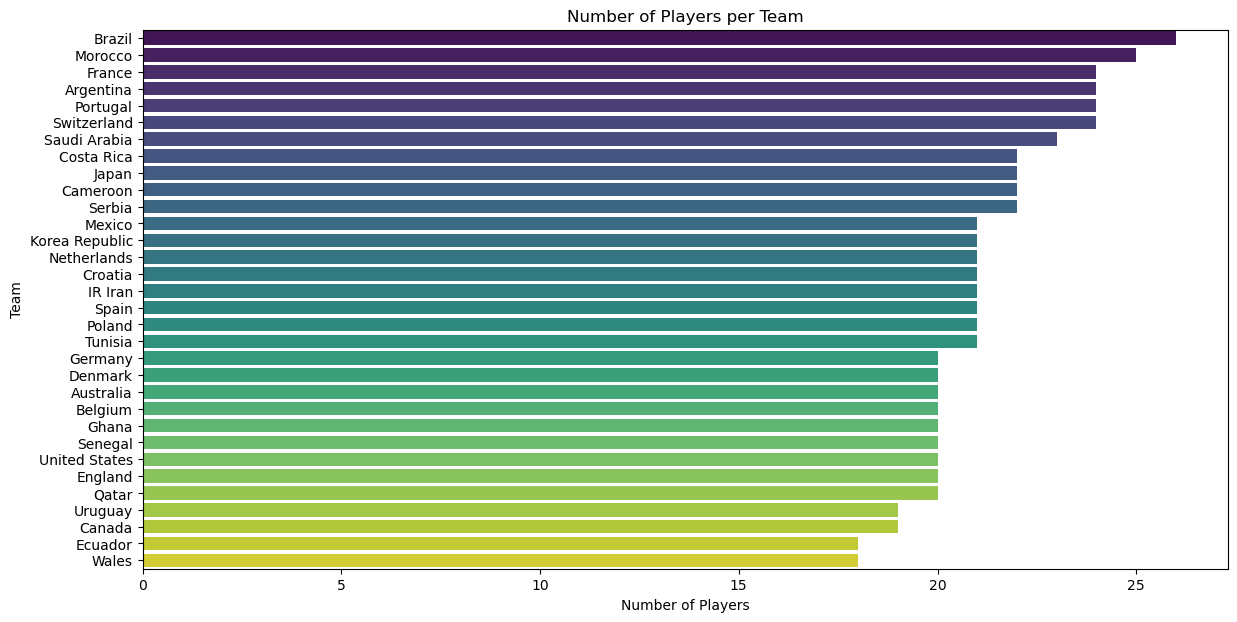

In [173]:
#  Players per Team
# Show the number of players in each team to understand squad size and depth.
plt.figure(figsize=(14,7))
# Count number of players per team
sns.countplot(y='team', data=df,  order=df['team'].value_counts().index,  # sort by number of players
              palette='viridis')  # color scale
plt.title('Number of Players per Team')
plt.xlabel('Number of Players')
plt.ylabel('Team')
plt.show()

Key Insights: Players per Team

- Most teams register between 21 and 26 players, showing a largely standardized squad size across the tournament.

- Brazil has the largest squad (around 26 players), while teams like Wales, Ecuador, and Ghana have slightly smaller squads (around 18–20 players).

- The difference between the largest and smallest squads is relatively small, indicating no major imbalance in squad depth.

- Teams with slightly larger squads may have benefited from greater rotation options, while smaller squads likely relied on a more fixed core of players.

Overall Interpretation:

- Squad sizes are fairly consistent across teams, ensuring that later team-level comparisons (offense, defense, discipline) are not biased by squad depth. Minor differences may influence rotation and workload but do not distort overall tournament analysis.


C:\Users\user\AppData\Local\Temp\ipykernel_6804\3277291320.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




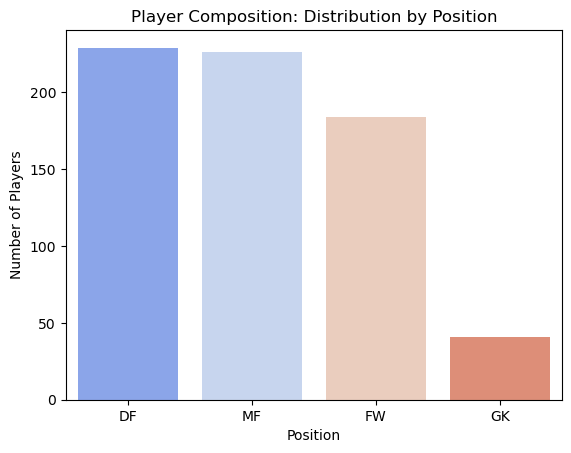

In [174]:
# 2.2 Player Distribution by Position
# Overall positional breakdown of players
sns.countplot(
    x='position',
    data=df,
    order=df['position'].value_counts().index,
    palette='coolwarm'
)

plt.title("Player Composition: Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()

 Key Insights: Player Composition by Position
- Defenders (DF) and Midfielders (MF) form the majority of players, showing emphasis on controlling the game and maintaining defensive stability.
- Forwards (FW) are fewer (~180 players), reflecting selective attacking roles rather than volume-based attacking strategies.
- Goalkeepers (GK) are the smallest group (~40), consistent with standard team structures and positional specialization.

Overall Interpretation:
- Teams prioritize defensive depth and midfield control, highlighting the importance of structure over aggressive attacking spread.
- Efficient attacking units are key, as fewer forwards mean scoring relies on conversion efficiency rather than the number of attacking players.

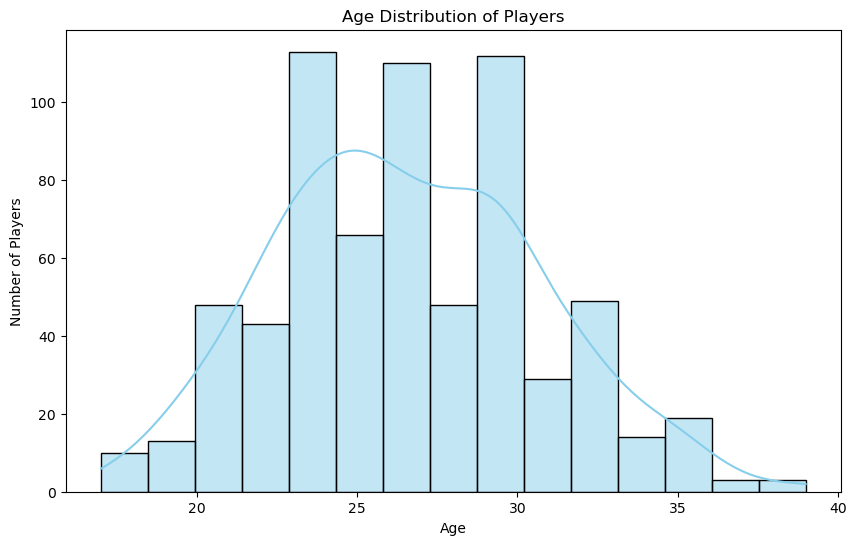

In [175]:
# Age Distribution
# Distribution of player ages across the tournament
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

Key Insights: Age Distribution of Players
- Most players are between 24–29 years old, representing the prime of physical and tactical ability.
- Very few players are under 20 or over 35, showing limited reliance on very young prospects or late-career veterans.
- The distribution is roughly bell-shaped, indicating a balanced mix of youth and experience across squads.

Overall Interpretation:
- Teams favor players in their prime, combining experience and athleticism to handle high-intensity tournament demands.
- Squads are built to maximize performance consistency across multiple matches.

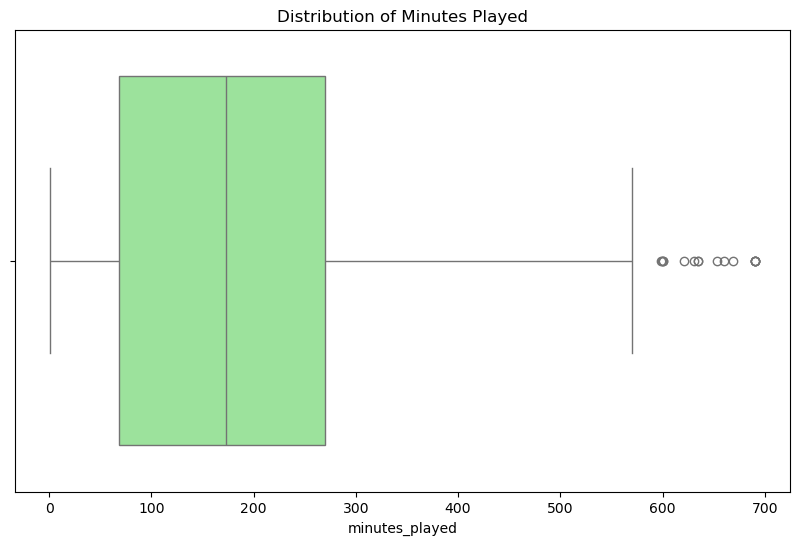

In [176]:
# Distribution of Minutes Played
# How evenly playing time is distributed among players
plt.figure(figsize=(10,6))
sns.boxplot(x='minutes_played', data=df, color='lightgreen')
plt.title('Distribution of Minutes Played')
plt.show()

Key Insights: Minutes Played

- A large proportion of players log low minutes (~1–100), representing substitutes or rotational players.
- A smaller group records high minutes (500–690), indicating key starters who were consistently relied upon.
- Outliers at the high end highlight players who were nearly ever-present, likely in pivotal positions.

Overall Interpretation:
- Teams depend heavily on a core set of players for match impact.
- While squad depth exists, overall performance is concentrated among regular starters, emphasizing the importance of fitness and tactical trust in key players.




### Top Performers
This section highlights the most impactful players of the tournament based on key individual performance metrics. The focus is on direct contributions rather than tactical roles or positional responsibilities.

The analysis first identifies the top goal scorers to show which players had the greatest finishing impact. It then examines the leading assist providers to highlight creativity and chance creation across teams. Finally, defensive contributors are analyzed using total defensive actions to recognize players who consistently supported their teams through tackling, interceptions, and blocks.

Together, these views provide a balanced snapshot of individual excellence across attacking, creative, and defensive aspects of the tournament.

C:\Users\user\AppData\Local\Temp\ipykernel_6804\4099706386.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




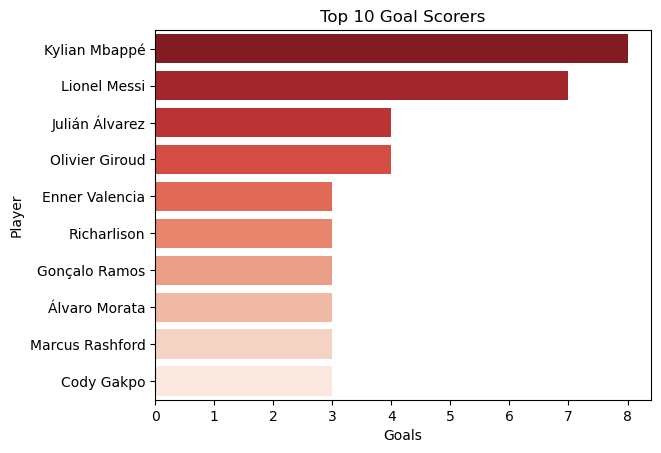

In [177]:
#  Top 10 Goal Scorers
# Identify players who scored the most goals, highlighting finishing impact.
top_scorers = df.sort_values('goals', ascending=False).head(10)

sns.barplot(
    x='goals',
    y='player_name',
    data=top_scorers,
    palette='Reds_r'
)

plt.title("Top 10 Goal Scorers")
plt.xlabel("Goals")
plt.ylabel("Player")
plt.show()

Key Insights: Top 10 Goal Scorers

- Kylian Mbappé leads with 8 goals, dominating scoring charts.

- Lionel Messi (7 goals) is highly impactful, reinforcing his dual role as scorer and creator.

- Steep decline after the top 3 shows goal concentration among elite attackers.

- Secondary scorers (3–4 goals) form a competitive second tier but contribute less than top players.

- Teams rely heavily on a few key players for goal-scoring output.

Overall Interpretation:
- Goal-scoring is concentrated among elite attackers.

C:\Users\user\AppData\Local\Temp\ipykernel_6804\2963623403.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




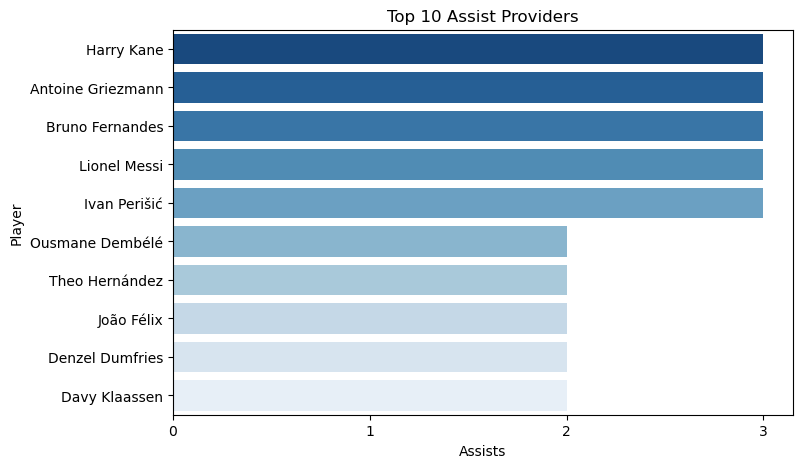

In [178]:
# Top 10 Assist Providers
# Identify players who provided the most assists, highlighting creativity and chance creation.
# Top 10 Assist Providers
top_assists = df.sort_values('assists', ascending=False).head(10)

plt.figure(figsize=(8, 5))

sns.barplot(
    x='assists',
    y='player_name',
    data=top_assists,
    palette='Blues_r'
)
plt.title("Top 10 Assist Providers")
plt.xlabel("Assists")
plt.ylabel("Player")

# Force integer ticks on x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

Key Insights: Top 10 Assist Providers

- Bruno Fernandes, Antoine Griezmann, and Harry Kane top the assists chart, showing creative dominance.

- Lionel Messi and Ivan Perišić provide versatile playmaking support across teams.

- Clear drop after the top five shows separation between elite creators and secondary contributors.

- Secondary players (João Félix, Raphaël Guerreiro) contribute from wide or defensive roles.

- Playmaking responsibility is concentrated but slightly distributed beyond central midfielders.

Overall Interpretation:
- Creative output depends on a few standout players.


C:\Users\user\AppData\Local\Temp\ipykernel_6804\652731222.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




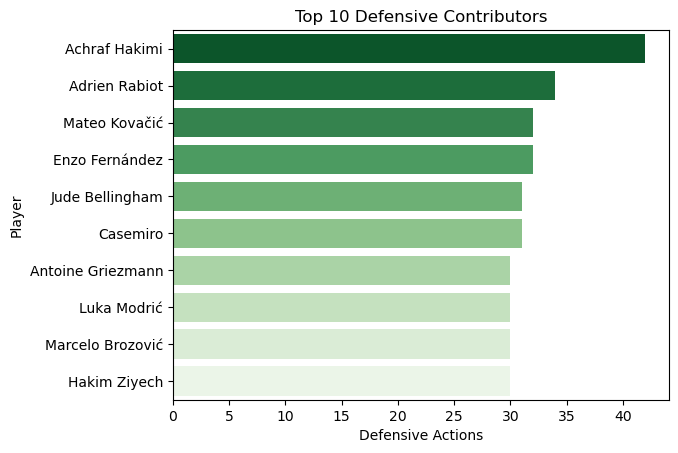

In [179]:
# Top 10 Defensive Contributors
# Identify players most involved in defensive actions (tackles, interceptions, blocks).
top_defenders = df.sort_values('defensive_actions', ascending=False).head(10)

sns.barplot(
    x='defensive_actions',
    y='player_name',
    data=top_defenders,
    palette='Greens_r'
)

plt.title("Top 10 Defensive Contributors")
plt.xlabel("Defensive Actions")
plt.ylabel("Player")
plt.show()

Key Insights: Top 10 Defensive Contributors

- Achraf Hakimi tops defensive actions (~42), showing full-backs’ importance in modern defense.

- Central midfielders (Rabiot, Enzo Fernández, Casemiro) contribute significantly to defensive stability.

- Jude Bellingham’s high defensive output shows tactical discipline from attacking positions.

- Defensive actions are fairly evenly spread; top performers show consistency rather than extreme dominance.

- Defense relies less on single players compared to attacking metrics.

Overall Interpretation:

- Defensive stability is shared across multiple roles.

- Top defenders provide consistent impact, supporting team performance collectively.


C:\Users\user\AppData\Local\Temp\ipykernel_6804\3728880692.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




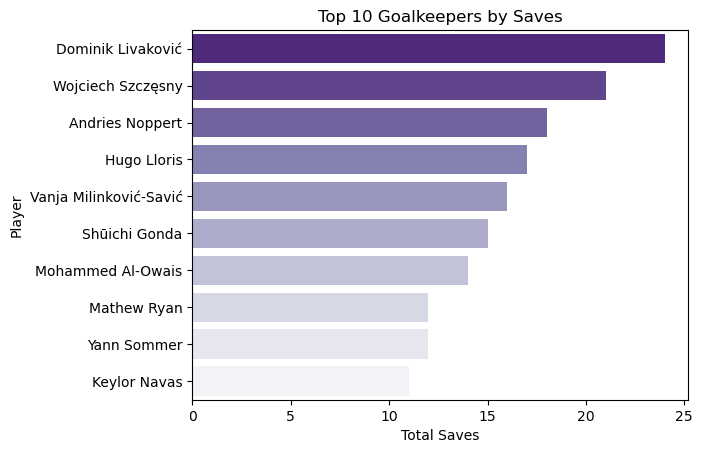

In [180]:
# Top 10 Goalkeepers by Saves
# Highlight goalkeepers who made the most saves, indicating defensive reliability.
top_goalkeepers = df.sort_values('total_saves', ascending=False).head(10)

sns.barplot(
    x='total_saves',
    y='player_name',
    data=top_goalkeepers,
    palette='Purples_r'
)

plt.title("Top 10 Goalkeepers by Saves")
plt.xlabel("Total Saves")
plt.ylabel("Player")
plt.show()

Key Insights: Top 10 Goalkeepers by Saves

- Dominik Livaković leads with 24 saves, reflecting high shot-stopping workload.

- Szczęsny and Noppert follow with 17–18 saves, providing critical defensive contributions.

- Lower save counts (Ryan, Sommer, Navas) reflect stronger team defense or fewer shots faced.

- Goalkeeping impact varies with team defensive strength and match context.

- Top keepers play a pivotal role in maintaining defensive solidity.

Overall Interpretation:

- Goalkeeping workload and performance are crucial for team defensive outcomes.

- Teams with high-performing goalkeepers rely less on defensive vulnerabilities being exposed.

### Performance Outcome Distributions

This section looks at how key performance outcomes — goal contributions, clean sheets, and disciplinary cards — are spread across the tournament. The focus is on how common or rare different values are, rather than on individual comparisons.

First, it examines the distribution of goal contributions to show how attacking output varies across players across the tournament. Then, it looks at team-wise clean sheets to understand how defensive outcomes are distributed at the collective level. Finally, it reviews cards to identify overall patterns in player discipline.

Together, these charts provide a clear picture of overall trends in attacking, defensive, and disciplinary outcomes across the tournament.

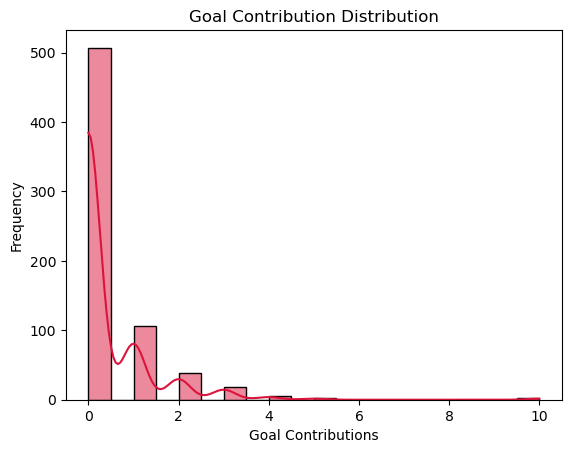

In [181]:
# Distribution of goal contributions (goals + assists)
# Shows how attacking contributions are distributed in the tournament
sns.histplot(
    df['goal_contribution'],
    bins=20,
    kde=True,
    color='crimson'
)

plt.title("Goal Contribution Distribution")
plt.xlabel("Goal Contributions")
plt.ylabel("Frequency")
plt.show()

Key Insights: Goal Contribution Distribution

- Most players have zero goal contributions, showing that low attacking output is very common.

- A smaller group contributes 1–2 goals/assists, while high contributions (3–10) are rare.

- Strong attacking performances are concentrated among a few players.

Overall Interpretation:

- Attacking output is unevenly distributed across the tournament.

- Most players contribute little, while only a small subset have a significant attacking impact.


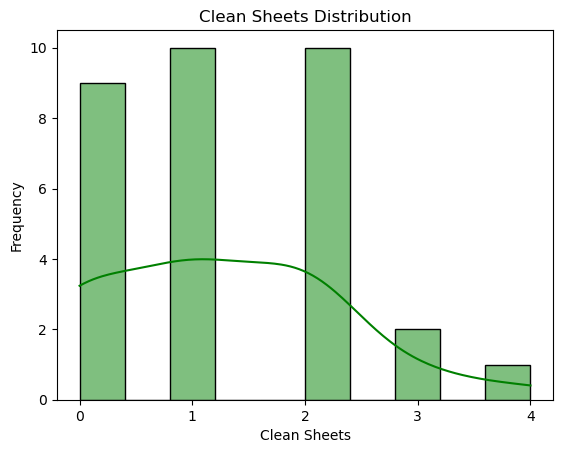

In [182]:
# Team-wise Clean Sheets Distribution
# Shows how defensive outcomes (clean sheets) are distributed across the tournament
sns.histplot(
    team_summary['team_clean_sheets'],
    bins=10,kde=True,
    color='green')

plt.title("Clean Sheets Distribution")
plt.xlabel("Clean Sheets")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


Key Insights: Team-wise Clean Sheets Distribution

- The distribution is right-skewed, with most teams recording 0–2 clean sheets, indicating that consistent defensive shutouts are relatively uncommon across the tournament.

- A noticeable concentration occurs around 1–2 clean sheets, suggesting that while many teams achieved occasional defensive success, sustaining it over multiple matches was challenging.

- Only a small number of teams reached 3 or more clean sheets, highlighting a clear separation between defensively elite teams and the rest of the field.

- The low frequency at higher clean-sheet values shows that strong defensive organization and consistency were limited to a few teams.

Overall Interpretation:
- Clean sheets are a team-level outcome driven by collective defensive structure rather than individual effort. This distribution confirms that defensive dominance was concentrated among a small subset of teams, while most teams experienced limited or sporadic defensive success during the tournament.

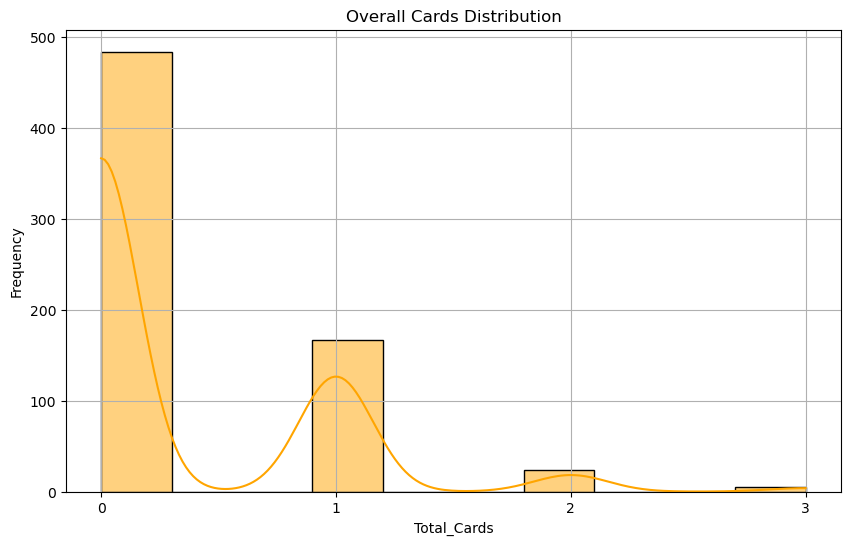

In [183]:
# Overall Cards Distribution
# Shows how disciplinary actions (cards) are distributed across the tournament
plt.figure(figsize=(10,6))
sns.histplot(df['total_cards'],bins=10,kde=True,color='orange')
plt.title('Overall Cards Distribution')
plt.xlabel('Total_Cards')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid()
plt.show()

Key Insights: Overall Cards Distribution

- Most players receive zero cards, reflecting generally disciplined play.

- Fewer players receive one card, and very few accumulate 2–3 cards.

- High card counts are rare, mostly linked to high-contact or defensive roles.

Overall Interpretation:

- Disciplinary actions are limited across the tournament.

- Most participants receive few or no cards, with only a small group accounting for higher totals.

### Correlation Heatmap

This section examines how key player-level performance metrics are related across the tournament. The heatmap highlights which metrics tend to move together (such as goals and assists), which show weak or no relationship (such as cards), and how playing time is associated with overall statistical output.
By visualizing correlations between attacking, defensive, and disciplinary metrics, this chart helps identify role-based patterns and clarifies whether observed performance trends are driven by player roles or by time spent on the pitch.

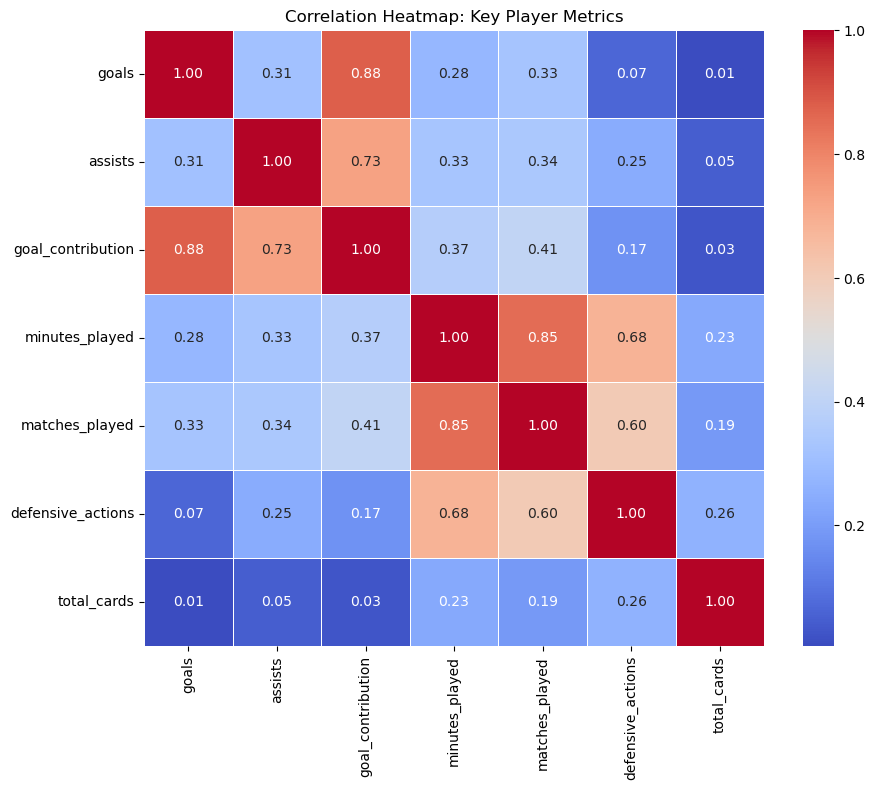

In [184]:
# Correlation Heatmap
# Select key numerical columns for correlation
numeric_cols = [
    'goals', 
    'assists', 
    'goal_contribution', 
    'minutes_played',
    'matches_played', 
    'defensive_actions', 
    'total_cards']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    fmt=".2f"
)
plt.title("Correlation Heatmap: Key Player Metrics")
plt.show()

Key Insights: Correlation Heatmap – Key Player Metrics

Goal contribution is strongly linked to goals (0.88) and assists (0.73), making it a good measure of overall attacking performance.

Goals and assists are only somewhat related (0.31), meaning the main scorers and main creators are usually different players.

Minutes played is closely related to matches played (0.85) and moderately related to goal contribution (0.37), assists (0.33), and defensive actions (0.68). Players who play more tend to have higher stats.

Defensive actions are mostly separate from attacking stats, showing clear differences between defensive and offensive roles.

Total cards have a small link with defensive actions (0.26) and minutes played (0.24). Players who defend more or play longer get slightly more cards, but cards are mostly independent of attacking stats.

Overall, stats group by player role: attackers, defenders, and disciplinary actions form their own clusters.

Overall Interpretation

Players perform based on their roles: attackers focus on goals/assists, defenders on defensive actions, and cards depend on defensive involvement and playing time.

Playing time is the main factor that affects most stats, connecting different aspects of performance across the tournament.

## Team_Level_Analysis
This section looks at how teams performed overall by combining data from all their players. It covers how well teams attacked, how efficiently they scored, how much defensive work they did, how effective their defense was, and how disciplined they were on the field. Each part matches its chart and clearly shows what is being measured, how teams compare with each other, and why these differences matter in the tournament.

###  Top_Team_Performers

This section highlights the top teams in the tournament by combining both attacking and defensive performance.
It shows which teams were strongest in attack through high goal contributions, which teams put in the most defensive effort, and which teams achieved the best defensive outcomes through clean sheets.
By looking at these three aspects together, the section provides a simple and clear understanding of the teams that performed best overall, balancing scoring ability, defensive work rate, and defensive consistency during the tournament.

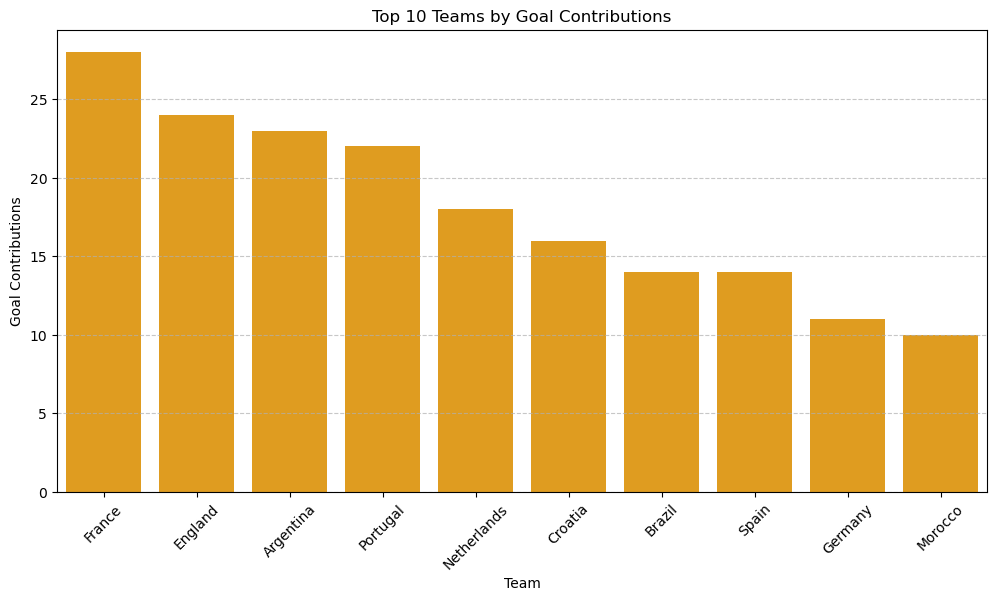

In [185]:
# Top 10 Teams by Goal Contributions
top_goal_contrib = team_summary.sort_values('team_goal_contributions', ascending=False).head(10)
# Ensure only top 10 teams are plotted
top_goal_contrib['team'] = top_goal_contrib['team'].astype(str)
plt.figure(figsize=(12,6))
sns.barplot(
    x='team',
    y='team_goal_contributions',
    data=top_goal_contrib,
    color='orange'
)
plt.title('Top 10 Teams by Goal Contributions')
plt.xlabel('Team')
plt.ylabel('Goal Contributions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Key Insights: Top 10 Teams by Goal Contributions

- France clearly leads the tournament with the highest goal contributions (28), establishing a strong attacking benchmark relative to all other teams.

- England (24), Argentina (23), and Portugal (22) form a closely grouped second tier, indicating comparable attacking strength rather than a single dominant challenger.

- A noticeable drop occurs after the top four teams, with the Netherlands (18) and Croatia (16) recording moderately lower attacking output.

- Brazil and Spain (14 each) show similar, mid-range goal contributions, reflecting steady but less dominant attacking performance.

- Germany (11) and Morocco (10) record the lowest goal contributions among the top ten, suggesting their success relied more on defensive structure or efficiency than on high scoring output.

Overall Interpretation:
- Attacking output is unevenly distributed across teams, with a small group accounting for a disproportionate share of the tournament’s goal contributions.

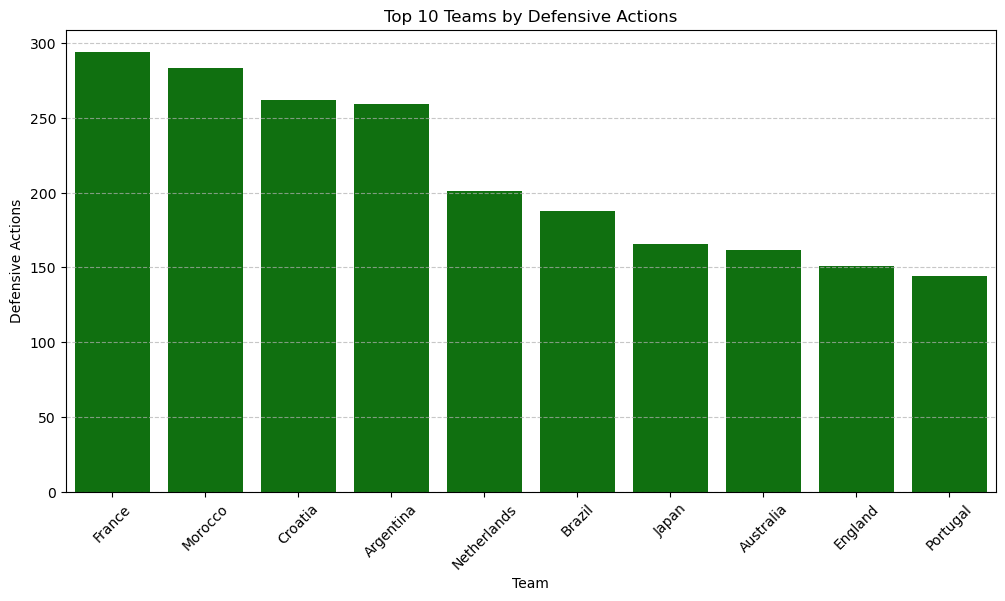

In [186]:
# Top 10 Teams by Defensive Actions
# Sort teams by total defensive actions and take top 10
top_defensive = team_summary.sort_values('team_defensive_actions', ascending=False).head(10)
# Convert 'team' to string for correct plotting
top_defensive['team'] = top_defensive['team'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(
    x='team', 
    y='team_defensive_actions', 
    data=top_defensive, 
    color='green'
)
plt.title('Top 10 Teams by Defensive Actions')
plt.xlabel('Team')
plt.ylabel('Defensive Actions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Key Insights: Top 10 Teams by Defensive Actions

- France (295), Morocco (282), Croatia (262), and Argentina (259) recorded the highest number of defensive actions, showing they defended very often.

- A high number of defensive actions usually means a team faced more pressure or spent more time defending, not that they defended poorly.

- The Netherlands (201) and Brazil (188) show medium defensive involvement, suggesting more controlled defensive play.

- England (150) and Portugal (145) have the lowest defensive actions in the top 10, meaning they spent less time defending.

- Defensive actions vary a lot between teams, mainly because of different playing styles and match situations.

Overall Interpretation
- High defensive actions reflect defensive involvement and workload, not necessarily defensive quality..

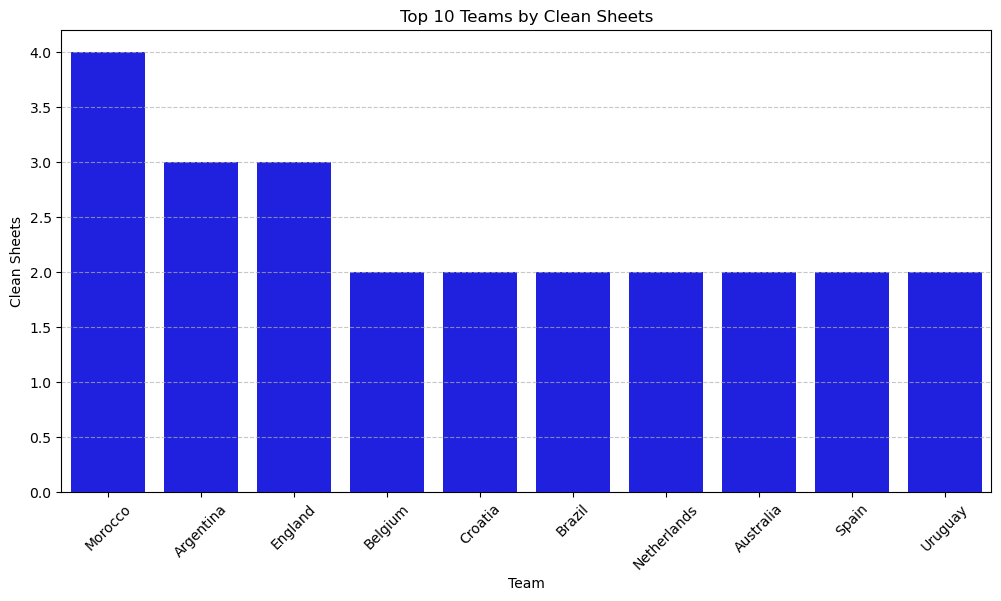

In [187]:
# Top 10 Teams by Clean Sheets
# Sort teams by clean sheets and take top 10
top_clean_sheets = team_summary.sort_values('team_clean_sheets', ascending=False).head(10)
# Convert 'team' to string for correct plotting
top_clean_sheets['team'] = top_clean_sheets['team'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(
    x='team', 
    y='team_clean_sheets', 
    data=top_clean_sheets, 
    color='blue'
)
plt.title('Top 10 Teams by Clean Sheets')
plt.xlabel('Team')
plt.ylabel('Clean Sheets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Key Insights: Top 10 Teams by Clean Sheets

- Morocco leads with 4 clean sheets, showing very strong and consistent defending.

- Argentina and England follow with 3 clean sheets each, proving they were defensively reliable throughout the tournament.

- Many teams, including Croatia, Brazil, Netherlands, Spain, and others, have 2 clean sheets, showing similar defensive results.

- The small difference in clean sheet numbers shows that defensive success was closely matched among top teams.

- Teams with fewer defensive actions can still keep clean sheets, showing that efficiency matters more than effort.

Overall Interpretation
- Clean sheets show defensive success, not defensive workload.

###  Offensive_Performance
This section shifts focus from attacking volume to attacking efficiency, analyzing how effectively teams converted shots on target into goals.
While overall attacking output is covered in the Top Team Performers section, this analysis isolates finishing quality by comparing goals scored against shots on target at the team level.
By examining both shot volume and goal conversion rate together, the visualization highlights why some teams scored more despite taking fewer shots, while others struggled to convert high shot volumes into goals.

In [188]:
# Offensive Efficiency: Shots on Target vs Goals
# Use percentage for easier interpretation
team_summary['goal_conversion_rate_pct'] = np.where( team_summary['team_shots_on_target'] > 0,
    (team_summary['team_goals'] / team_summary['team_shots_on_target']) * 100,0)

fig = px.scatter(
    data_frame=team_summary,
    x='team_shots_on_target',
    y='team_goals',
    color='goal_conversion_rate_pct',      # use % for color
    size='team_goal_contributions',        # total contributions
    hover_name='team',
    hover_data={
        'team_shots_on_target': True,
        'team_goals': True,
        'goal_conversion_rate_pct': ':.1f',
        'team_goal_contributions': True
    },
    text='team',
    color_continuous_scale='Viridis',
    title='Team Offensive Efficiency: Goals vs Shots on Target'
)

fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title='Shots on Target',
    yaxis_title='Goals Scored',
    coloraxis_colorbar=dict(title='Goal Conversion Rate (%)'),
    width=1000,
    height=600
)

fig.show()
fig.write_html("team_offensive_efficiency.html")



Key Insights: Team Offensive Efficiency (Goals vs Shots on Target)

- Teams that take more shots on target usually score more goals — there is a strong positive relationship (correlation ≈ 0.85) between shots and goals.

- France scored the most goals (16) from 33 shots on target, showing they are strong in both creating and finishing chances. Argentina also scored high (15 goals from 41 shots).

- Netherlands and Spain scored well (9–10 goals) with fewer shots (~15–16), meaning they were very efficient at converting chances into goals (~60%).

- Brazil took the most shots (~40) but scored only 8 goals, showing low finishing efficiency (~20%).

- England (~27 shots, 13 goals) and Portugal (~24 shots, 12 goals) have balanced attack with  efficiency (~50%).

- Teams with few shots and goals (like Qatar, Canada, Belgium) had limited attacking impact.

- Conversion rate differences (10%–60%) explain why some teams score more than others even with similar shot numbers.

Overall Interpretation:
- Teams are not only judged by how many shots they take, but also by how efficiently they convert them into goals.
- High shot volume helps, but teams like Netherlands and Spain show that efficient finishing can be as important as creating many chances. 
- France and Argentina combine both volume and efficiency, making them the most dominant attackers in the tournament.

### Defensive_Performance

This section shifts the focus from defensive volume to defensive effectiveness, examining how well teams convert defensive control into tangible outcomes at the team level.  
Rather than assuming that higher defensive activity alone leads to stronger results, the analysis evaluates defensive outcomes in relation to shots faced, highlighting teams that limited opposition opportunities and maintained defensive stability.

By comparing shots faced (defensive control) with clean sheets (defensive outcome), and incorporating goals conceded and defensive actions for additional context, the visualization provides a clearer picture of defensive organization, workload, and overall defensive performance.  
This approach allows for the identification of teams that defended efficiently through structure and positioning, rather than relying solely on reactive defensive effort.

In [189]:
# Defensive Efficency: Clean Sheets vs Shots Faced
# Shows defensive performance using control, outcome, and goals conceded

fig = px.scatter(
    data_frame=team_summary,
    x='team_total_shots_faced',     # Defensive control (lower = better)
    y='team_clean_sheets',          # Defensive outcome
    color='team_goals_against',     # Lower = better defense
    size='team_defensive_actions',  # Emphasize defensive effort
    hover_name='team',
    text='team',
    color_continuous_scale='RdYlGn_r',  # Green = better
    title='Best Defensive Performance: Clean Sheets vs Shots Faced'
)

# Improve text readability
fig.update_traces(textposition='top center')

# Layout and labels
fig.update_layout(
    xaxis_title='Shots Faced (Lower = Better)',
    yaxis_title='Clean Sheets (Outcome)',
    width=1000,
    height=600,
    coloraxis_colorbar=dict(
        title='Goals Conceded (Lower = Better)'
    )
)

fig.show()
fig.write_html("team_defensive_efficency.html")

Key Insights: Team Defensive Performance (Clean Sheets vs Shots Faced)

- Teams that face fewer shots tend to record more clean sheets, confirming that defensive control is more effective than reactive defending. Teams facing under ~15 shots generally achieve 2–4 clean sheets, while teams facing  20+ shots mostly remain at 0–1 clean sheets.

- Morocco stands out as the most defensively efficient team, facing approximately 18 shots and recording the highest number of clean sheets (4), while conceding relatively few goals. This reflects excellent defensive organization and compactness.

- Argentina faced around 14–15 shots and achieved 3 clean sheets, demonstrating strong defensive structure and discipline under moderate pressure.

- England achieved 3 clean sheets while facing only ~12 shots, highlighting high defensive efficiency through effective shot prevention and territorial control.

- France faced approximately 26–27 shots yet managed only 1 clean sheet, indicating defensive inefficiency despite sustained pressure and involvement.

- Teams such as Qatar (~22 shots), Canada (~15 shots), Ghana (17 shots), and Saudi Arabia (~18 shots) recorded 0 clean sheets, placing them in the low-outcome defensive zone.

- Teams with moderate shot exposure — such as Croatia (~31 shots), Netherlands (~22 shots), Australia (~18 shots), and Poland (~25 shots) — generally secured 1–2 clean sheets, reflecting balanced but not elite defensive performance.

Overall Interpretation:

- Defensive success is influenced more by limiting opposition shooting opportunities than by responding to them after the fact.

- Teams like Morocco, England, and Argentina combine disciplined positioning with effective pressing to reduce shot volume, resulting in higher clean-sheet counts.

- In contrast, teams facing high shot volumes (25+ shots) are forced into reactive defending, which increases pressure without proportionate defensive returns.

- Overall, the analysis confirms that defensive efficiency is best defined by strong shot control, compact structure, and execution, rather than defensive workload alone.


###  Discipline_Level
This section evaluates team discipline by examining total cards, yellow cards, and red cards.  
The charts compare card accumulation across teams to highlight differences in playing style, from highly physical approaches with frequent minor fouls to more disciplined and controlled defensive behavior.  
Yellow cards drive most of the differences between teams, while red cards are rare, indicating that serious disciplinary breaches were uncommon.  
Overall, these plots show which teams tended to play aggressively and which maintained composure on the field.


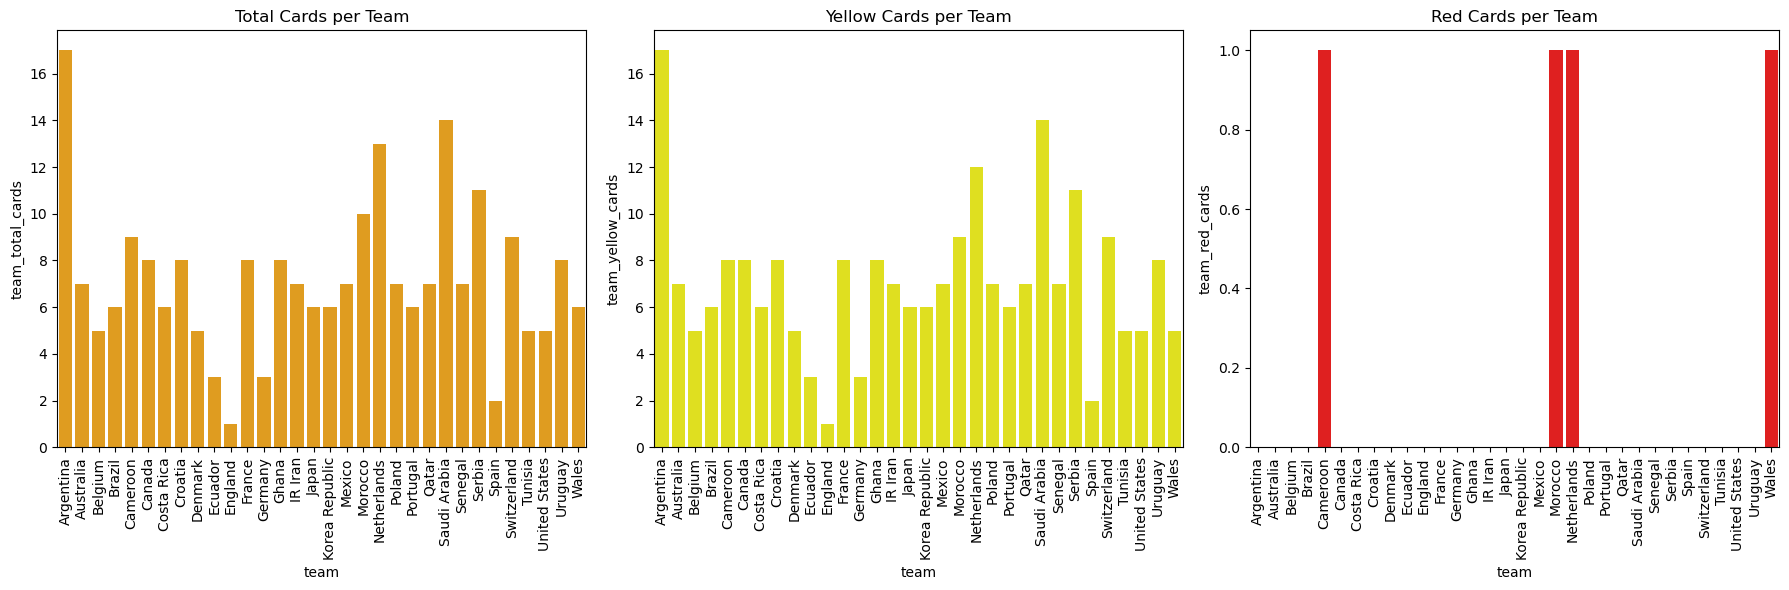

In [190]:
# Team Discipline Analysis
# Analyze team discipline through card accumulation.

fig, axes = plt.subplots(1, 3, figsize=(18,6))  # 1 row, 3 columns

# Total Cards
sns.barplot(
    x='team', 
    y='team_total_cards', 
    data=team_summary.sort_values('team_total_cards', ascending=False), 
    color='Orange', 
    ax=axes[0]
)
axes[0].set_title('Total Cards per Team')
axes[0].tick_params(axis='x', rotation=90, labelsize=10)


# Yellow Cards
sns.barplot(
    x='team', 
    y='team_yellow_cards', 
    data=team_summary.sort_values('team_yellow_cards', ascending=False), 
    color='Yellow', 
    ax=axes[1]
)
axes[1].set_title('Yellow Cards per Team')
axes[1].tick_params(axis='x', rotation=90, labelsize=10)

# Red Cards
sns.barplot(
    x='team', 
    y='team_red_cards', 
    data=team_summary.sort_values('team_red_cards', ascending=False), 
    color='Red', 
    ax=axes[2]
)
axes[2].set_title('Red Cards per Team')
axes[2].tick_params(axis='x', rotation=90, labelsize=10)


plt.tight_layout()
plt.show()

Key Insights: Team Discipline (Total, Yellow, and Red Cards)

- Argentina recorded the highest total cards (~17), almost entirely yellow cards, showing a very physical style of play.

- Saudi Arabia and Qatar also accumulated high total cards (~14 each), reflecting aggressive defensive approaches and frequent fouling.

- Morocco, the Netherlands, and Senegal had elevated yellow card counts (~11–14), indicating consistent minor fouls but controlled defensive challenges.

- Belgium, Mexico, and Portugal recorded moderate total cards (~7–10), demonstrating a balance between aggression and discipline.

- England, Denmark, Switzerland, and the United States had very low total cards (~2–5), highlighting disciplined and low-risk defensive strategies.

- Red cards were rare, with only Cameroon, the Netherlands, Portugal, and Uruguay receiving one red card each. No team received more than one, showing that serious disciplinary breaches were uncommon.

Overall Interpretation

- Team discipline is primarily shaped by yellow card accumulation, reflecting minor infractions and controlled aggressive play.

- High-card teams (Argentina, Qatar, Saudi Arabia) rely on physical defending, while low-card teams (England, Denmark, Switzerland, USA) rely on tactical discipline and composure.

- Overall, card accumulation provides insight into playing style and defensive approach, rather than directly reflecting success or failure on the field.

# Insights and Key Findings

This chapter presents the key insights derived from the exploratory data analysis, translating statistical patterns and visual findings into meaningful interpretations. Rather than describing individual charts or metrics, the focus is on explaining what the observed patterns reveal about performance, participation, and competitive dynamics within the tournament.

The insights are organized across two levels of analysis. The first section examines tournament-level trends to provide a macro understanding of squad composition, player utilization, performance distribution, and overall playing style across the competition. The second section builds on this foundation by evaluating team-level performance, highlighting differences in attacking efficiency, defensive organization, and disciplinary behavior among teams.

Together, these insights offer a structured and evidence-based narrative that connects individual contributions, collective team performance, and overall tournament characteristics, forming a clear bridge between exploratory analysis and deeper performance evaluation.

## Tournament-Level_Insights
- This section presents a consolidated view of tournament-wide patterns, combining player demographics, team composition, individual performance leaders, outcome distributions, and metric correlations. 
- It establishes the overall competitive context and highlights how playing time, roles, and collective structures shape performance across the tournament.

### Tournament_Overall_Summary
This section provides a high-level summary of the tournament, covering participation, age profile, playing time, attacking output, and discipline to set context for deeper analysis.

**Key Insights:**

- The tournament included 32 teams and 680 players, reflecting full squad participation across all nations.

- The average player age was 26.6 years, showing a mix of experienced players and those in their physical prime.

- Players logged an average of 191 minutes, highlighting the distinction between regular starters and rotational players.

- Across the tournament, 170 goals and 121 assists were recorded, indicating moderate attacking output.

- 230 total cards were issued, showing generally disciplined play with few extreme incidents.

**Overall Interpretation:**
- The tournament was competitive, well-structured, and balanced, setting a solid foundation for deeper player and team analysis.

### Player Profile & Participation
 - This section explores how players were distributed across teams, their positions, ages, and playing time. 
 - It provides insight into squad composition, reliance on key players, and workload distribution.


#### 1. Players per Team

**Key Insights:**
- Most teams register between **21 and 26 players**, showing fairly standardized squad sizes.

- Brazil has the largest squad with **26 players**, while Wales, Ecuador, and Ghana have smaller squads (**18–19 players**).

- The difference between the largest and smallest squads is only around **8 players**, suggesting no major imbalance in squad depth.

- Teams with slightly larger squads had more rotation options, while smaller squads relied on a core group of players.

**Overall Interpretation:**  
- Squad sizes are consistent, so later team comparisons are not biased by squad depth.

#### 2. Player Distribution by Position

**Key Insights:**
- Defenders (DF): **~230 players** and Midfielders (MF): **~225 players** make up the majority, emphasizing defensive stability and midfield control.

- Forwards (FW): **~180 players**, indicating selective attacking roles rather than high-volume attackers.

- Goalkeepers (GK): **~40 players**, consistent with standard team structures.

**Overall Interpretation:**  
- Teams prioritize defensive depth and midfield control, highlighting the importance of structure over aggressive attacking spread.
- Efficient attacking units are key, as fewer forwards mean scoring relies on conversion efficiency rather than the number of attacking players

#### 3. Age Distribution of Players

**Key Insights:**
- Most players are between **24–29 years old**, representing the prime of physical and tactical ability.

- Very few players are under **20** or over **35**, showing limited reliance on very young prospects or late-career veterans.

- The distribution is roughly bell-shaped, indicating a balanced mix of youth and experience across squads.

**Overall Interpretation:**  
 - Teams mainly rely on players in their prime (ages 24–29) to ensure consistent performance and high fitness throughout the tournament.

#### 4. Distribution of Minutes Played

**Key Insights:**
- The **median playing time** is approximately **180 minutes**, indicating moderate involvement for the typical player.

- The **middle 50% of players** (about **340 out of 680 players**) played between **~80 and ~270 minutes**, showing an uneven distribution of playing time across the squad.

- A **small group of players** recorded very high minutes (**~600–700 minutes**), representing **regular starters** and core contributors.

- A noticeable number of players had **near-zero minutes**, indicating little or no match involvement.

**Overall Interpretation:**  
- Most playing time is concentrated among a small group of regular players, while the majority receive limited or occasional minutes, indicating restricted squad rotation.








### Top_Performers
This section highlights individual leaders across key performance areas—scoring, creativity, defense, and goalkeeping—to identify standout contributors.

#### 1. Top 10 Goal Scorers

**Key Insights:**
- Kylian Mbappé leads with **8 goals**, dominating the scoring charts.

- Lionel Messi scored **7 goals**, reinforcing his dual role as scorer and creator.

- There is a steep decline after the top 3, showing goal concentration among elite attackers.

- Secondary scorers contribute **3–4 goals**, forming a competitive second tier but with less impact than top players.

- Teams rely heavily on a few key players for goal-scoring output.

**Overall Interpretation:**  
- Goal-scoring is concentrated among elite attackers, making top performers pivotal for team success.

#### 2. Top 10 Assist Providers

**Key Insights:**
- The highest number of assists recorded is **3**, achieved by **Bruno Fernandes, Antoine Griezmann, Harry Kane, Lionel Messi, and Ivan Perišić**.

- The remaining players in the top 10 — **Theo Hernández, Davy Klaassen, Phil Foden, Raphaël Guerreiro, and João Félix** — each have **2 assists**.

- The difference between the top and bottom assist providers in the top 10 is **only 1 assist**, showing a narrow spread.

**Overall Interpretation:**  
- Assists are evenly distributed among the top players. No single player clearly dominates creativity, suggesting that chance creation is shared across multiple players rather than relying on one main playmaker.

#### 3. Top 10 Defensive Contributors

**Key Insights:**
- Achraf Hakimi leads all players with **42 defensive actions**, highlighting the strong defensive involvement of modern full-backs.

- Central midfielders contribute heavily: **Adrien Rabiot (34)**, **Enzo Fernández (32)**, and **Casemiro (30)**, underlining their role in shielding the defense.

- **Jude Bellingham** records **30 defensive actions**, showing high tactical discipline despite his advanced attacking role.

- Most players cluster between **29 and 32 defensive actions**, indicating a narrow performance gap and consistent contributions across teams.

- No single player exceeds the group by a wide margin, suggesting defensive work is evenly shared rather than dominated by one individual.

**Overall Interpretation:**  
- Defensive responsibility is distributed across multiple positions, including full-backs, midfielders, and attacking midfielders. With defensive actions ranging mainly from **29 to 34**, team defensive stability is built on collective consistency rather than reliance on a single defender.


#### 4. Top 10 Goalkeepers by Saves  

**Key Insights:**

- **Dominik Livaković** tops the chart with **24 saves**, highlighting his high shot-stopping workload.

- **Szczęsny (18 saves)** and **Noppert (17 saves)** provide crucial defensive contributions for their teams.

- Lower save counts from **Ryan, Sommer, and Navas** reflect either stronger team defenses or fewer shots faced.

- Goalkeeping impact depends on both team defensive strength and match context.

- Top goalkeepers play a pivotal role in maintaining overall defensive solidity.

**Overall Interpretation:**  
- Goalkeeper performance is critical for team defensive outcomes. Teams with high-performing goalkeepers are less exposed defensively and can rely on their shot-stopping abilities to maintain stability.


### Performance Outcome Distributions

This section examines how key performance outcomes — goal contributions, clean sheets, and disciplinary cards — are spread across the tournament. It focuses on the prevalence of different values rather than individual comparisons. The goal is to highlight overall trends in attacking, defensive, and disciplinary performance.

#### 1. Goal Contribution Distribution

**Key Insights:**
- Most players have **0 goal contributions**, showing that low attacking output is very common.

- A smaller group contributes **1–2 goals/assists**, while high contributions (**3–10 goals/assists**) are rare.

- Strong attacking performances are concentrated among a few players, highlighting the impact of elite attackers.

**Overall Interpretation:**  
- Attacking output is unevenly distributed across the tournament. While most players contribute little, a small subset of players are responsible for a significant portion of goal-scoring and assists.




#### 2. Team-wise Clean Sheets Distribution

**Key Insights:**
- The distribution is right-skewed, with most teams recording **0–2 clean sheets**, indicating that consistent defensive shutouts were uncommon.

- Concentration occurs around **1–2 clean sheets**, showing occasional defensive success for many teams.

- Only a few teams achieved **3 or more clean sheets**, highlighting a clear gap between defensively elite teams and the rest.

- Strong defensive consistency was limited to a small subset of teams.

**Overall Interpretation:**  
- Clean sheets are a team-level outcome driven by collective defensive organization rather than individual effort. Defensive dominance was concentrated among a few teams, while most experienced sporadic success.


#### 3. Overall Cards Distribution

**Key Insights:**
- Most players received **0 cards**, reflecting generally disciplined play.

- Fewer players received **1 card**, and very few accumulated **2–3 cards**.

- High card counts were rare and mostly associated with defensive or high-contact roles.

**Overall Interpretation:**  
- Disciplinary actions were limited across the tournament. Most players remained disciplined, with only a small group accounting for the higher number of cards.

### Correlation Patterns Across Key Player Metrics
This section explores relationships between major performance metrics to identify how different aspects of player performance interact across the tournament.

#### Metric Correlation Analysis

**Key Insights:**
- Goal contribution has a **very strong relationship with goals (0.88)** and a **strong relationship with assists (0.73)**, confirming it as a reliable overall measure of attacking impact.

- The relationship between goals and assists is **moderate (0.31)**, indicating that main goal scorers and main creators are often different players.

- Minutes played is **strongly correlated with matches played (0.85)** and shows **moderate correlations** with goal contribution (0.37), assists (0.33), and defensive actions (0.68). Players who spend more time on the pitch tend to accumulate higher performance metrics.

- Defensive actions show **weak correlation with attacking metrics**, highlighting a clear separation between offensive and defensive roles.

- Total cards have **low correlations** with defensive actions (0.26) and minutes played (0.24), suggesting that disciplinary outcomes are slightly influenced by defensive involvement and playing time but remain largely independent of attacking output.

- Overall, performance metrics cluster by **player roles**, with attackers, defenders, and disciplinary actions forming distinct groups.

**Overall Interpretation:**  
- Player performance in the tournament is strongly influenced by role specialization. Attackers primarily contribute through goals and assists, defenders through defensive actions, and cards are linked mainly to defensive involvement and exposure time. Among all metrics, **minutes played is the central connecting factor**, influencing most performance outcomes across the tournament

#### Overall Tournament-Level Findings

- The tournament began on a balanced foundation, with all 32 teams bringing near-equal squad sizes and full player participation. This created a level playing field for competition.

- Teams largely trusted players in their prime years. By relying on players aged 24–29, squads were able to maintain both physical intensity and tactical discipline across multiple matches.

- As the tournament progressed, it became clear that playing time was concentrated. A small core of regular starters carried most of the minutes, while many squad players were used sparingly or as tactical options.

- In attack, success was driven by a few elite individuals. Goal scoring was heavily concentrated among top attackers, while assists were shared more evenly, showing that chance creation came from multiple sources rather than a single playmaker.

- Defensively, no single player dominated the workload. Defensive actions were spread across full-backs, midfielders, and attacking midfielders, reinforcing the idea that team structure mattered more than individual defending.

- Only a handful of teams managed repeated clean sheets, highlighting how difficult consistent defensive control was at the tournament level.

- Goalkeepers often became the last line of resistance. High save counts reflected both defensive pressure and the importance of reliable shot-stopping in tight matches.

- Discipline remained largely under control throughout the tournament. Most players avoided cards, with fouls and bookings mainly linked to defensive roles and longer playing time.

- Overall, the tournament told a clear story: teams that balanced experience, structured roles, and consistent playing time performed best. Success was less about individual brilliance and more about how well teams managed collective effort across the competition.

## Team-Level Insights


### Top Performing Teams
- This section identifies the strongest teams in the tournament based on key outcome-based metrics.

- It focuses on overall attacking contribution, defensive workload, and defensive results to highlight which teams consistently influenced matches at both ends of the pitch.

- Rather than evaluating efficiency, this section establishes a baseline of performance volume and outcomes before deeper efficiency-based analysis.


#### Top 10 Teams by Goal Contributions

**Key Insights:**  
- France clearly leads the tournament with the highest goal contributions (28), establishing a strong attacking benchmark relative to all other teams.  

- England (24), Argentina (23), and Portugal (22) form a closely grouped second tier, indicating comparable attacking strength rather than a single dominant challenger.  

- A noticeable drop occurs after the top four teams, with the Netherlands (18) and Croatia (16) recording moderately lower attacking output.  

- Brazil and Spain (14 each) show similar, mid-range goal contributions, reflecting steady but less dominant attacking performance.  

- Germany (11) and Morocco (10) record the lowest goal contributions among the top ten, suggesting their success relied more on defensive structure or efficiency than on high scoring output.  

**Overall Interpretation:**  
- Attacking output is unevenly distributed across teams, with a small group accounting for a disproportionate share of tournament goal contributions.  

- The top-performing teams combine high scoring volume with offensive efficiency, while lower contributors often rely on defensive stability to achieve results.  

- This distribution highlights the importance of key attacking players and teamwork in shaping overall team performance.

#### Top 10 Teams by Defensive Actions

**Key Insights:**  
- **France (295), Morocco (282), Croatia (262), and Argentina (259)** recorded the highest defensive actions, reflecting frequent defensive involvement.  

- High defensive actions often indicate facing more pressure or spending more time defending, **not poor defending**.  

- **Netherlands (201)** and **Brazil (188)** show moderate defensive effort.  

- **England (150)** and **Portugal (145)** have the lowest defensive actions in the top 10.  

- Defensive actions vary due to differences in **playing style and match situations**.  

**Overall Interpretation:**  
- High defensive actions reflect workload, **not necessarily defensive quality**.
- Teams with high defensive actions will face greater pressure or engaged more in defending, while teams like England and Portugal achieved results efficiently with fewer actions.  
- Differences reflect tactical approaches, playing styles, and match contexts, showing that effective defense depends on organization and execution, not just effort.

#### Top 10 Teams by Clean Sheets

**Key Insights:**  
- Morocco leads with 4 clean sheets, showing very strong and consistent defending.  

- Argentina and England follow with 3 clean sheets each, proving they were defensively reliable throughout the tournament.  

- Many teams, including Croatia, Brazil, Netherlands, Spain, and others, have 2 clean sheets, showing similar defensive results.  

- The small difference in clean sheet numbers shows that defensive success was closely matched among top teams.  

- Teams with fewer defensive actions can still keep clean sheets, showing that efficiency matters more than effort.  

**Overall Interpretation:**  
- Clean sheets reflect defensive effectiveness rather than sheer defensive activity.  

- Teams like Morocco, Argentina, and England combined solid organization with execution to achieve consistent defensive results.  

- Small differences in clean sheet counts among top teams indicate that efficiency, positioning, and teamwork are more critical than the total number of defensive actions.

### Team Efficiency: Offensive & Defensive
- This section moves beyond raw totals to evaluate how effectively teams converted effort into results.

- By analyzing attacking efficiency (goals vs shots on target) and defensive efficiency (clean sheets vs defensive actions), it highlights differences in execution, organization, and decision-making.

- The goal is to distinguish teams that relied on volume from those that achieved success through precision and efficiency.

#### Team Offensive Efficiency: Goals vs Shots on Target

**Key Insights:**
- Teams with higher shots on target generally score more goals, showing a clear positive relationship between chance creation and scoring output.

- Teams positioned in the **top right** combine high shot volume with high goal output, representing the strongest overall attacking performance.

- Teams in the **top left** score many goals from relatively few shots on target, indicating highly efficient finishing.

- Teams located in the **bottom right** generate many shots on target but convert them into goals inefficiently, highlighting poor finishing despite high attacking volume.

- Teams in the **bottom left** record low shots on target and low goal output, reflecting limited offensive impact.

- **France** combines high shot volume (~33 shots on target) with the highest goal total (16), supported by a strong conversion rate, making them the most complete attacking side.

- **Argentina** generated the most shots on target (~41) and scored 15 goals, indicating strong chance creation with slightly lower finishing efficiency.

- **Netherlands** and **Spain** stand out for elite finishing efficiency, scoring 9–10 goals from only ~15–16 shots on target, with conversion rates close to 60%.

- **Brazil** created many chances (~40 shots on target) but scored only 8 goals, highlighting poor finishing efficiency despite high attacking volume.

- **England** and **Portugal** show balanced attacking profiles, combining solid shot volume with average-to-good conversion rates.

- Teams with fewer shots and goals (Qatar, Canada, Belgium, Denmark, USA) had minimal offensive impact.

- Color variation emphasizes efficiency: teams with high conversion rate (yellowish) are very effective at turning chances into goals, regardless of shot volume.

- Bubble size reflects overall contribution: France and Argentina dominate in total attacking impact.

**Overall Interpretation:**
- Offensive performance is determined not just by how many chances a team creates, but by how efficiently those chances are converted into goals. 

- High-efficiency teams, like **Netherlands** and **Spain**, can outperform higher-volume sides, while **France** and **Argentina** combine high volume with strong conversion, making them the tournament’s most dominant attackers.

- Low conversion teams (e.g., **Brazil**) illustrate that high shooting volume alone doesn’t guarantee goal output.

There is a clear inverse relationship between shots faced and defensive success, indicating that teams allowing fewer shots tend to secure more clean sheets. This highlights the importance of defensive control over reactive defending.

- Teams positioned in the **top left** of the figure record high clean sheets while facing fewer shots, representing the strongest defensive performances.

- Teams in the **top right** maintain a high number of clean sheets despite facing many shots, indicating resilience and effective shot-stopping ability.

- Teams located in the **bottom left** face fewer shots but struggle to keep clean sheets, suggesting vulnerability despite defensive control.

- Teams in the **bottom right** face many shots and record few clean sheets, reflecting weak defensive performance overall.

- **Morocco** emerges as the best overall defensive performer, recording the highest number of clean sheets (4) while facing a relatively low number of shots and conceding few goals, reflecting strong defensive organization and structure.

- **Argentina** and **England** both achieved 3 clean sheets but through different defensive profiles:
  - Argentina faced slightly more shots, relying on compact and disciplined defending.
  - England faced fewer shots, indicating better territorial control and defensive efficiency.

- **France** faced a high number of shots and conceded more goals, managing only 1 clean sheet, suggesting that defensive pressure alone did not translate into strong outcomes.

- **Croatia** and **Netherlands** show balanced defensive performances, maintaining moderate clean sheets while facing a controlled number of shots, reflecting stability rather than dominance.

- Teams such as **Qatar**, Canada, **Ghana**, and **Saudi Arabia** fall into the low clean sheets–low defensive control zone, indicating limited defensive effectiveness and greater vulnerability.

- Larger marker sizes indicate higher defensive workload or actions, showing that increased defensive effort does not necessarily guarantee better outcomes without structural efficiency.

**Overall Interpretation:**

- Defensive success in the tournament was driven more by shot prevention and positional discipline than by sheer defensive workload.

- Teams like **Morocco**, **England**, and **Argentina** demonstrate that efficient defensive systems reduce opponent opportunities, leading to better outcomes with fewer emergency defensive actions.

- In contrast, teams facing frequent shots were often forced into reactive defending, increasing workload without proportionate gains in clean sheets.

- Overall, this analysis highlights that defensive efficiency is best measured by controlling opposition chances rather than defensive activity alone, reinforcing the value of tactical organization and compact team shape.

### Team Discipline and Fair Play Overview
- This section analyzes team-level discipline to understand how physicality and tactical aggression varied across teams.

- By examining total cards alongside yellow and red cards separately, it distinguishes controlled intensity from risky or excessive disciplinary behavior.

- The insights help contextualize defensive approaches and match control within high-pressure tournament conditions.

#### Team Discipline: Cards Analysis (Total, Yellow, and Red Cards)

**Key Insights:**
- **Argentina** recorded the highest total cards, driven largely by a high number of yellow cards, indicating a very physical and aggressive style of play.

- **Morocco** and **Qatar** also show high total card counts, reflecting intense defensive approaches and frequent tactical fouls.

- Yellow cards make up the vast majority of disciplinary actions across teams, highlighting that most fouls were cautionable rather than severe.

- Teams such as **Senegal, Netherlands, and Saudi Arabia** accumulated relatively high yellow card counts, suggesting consistent defensive pressure and physical challenges.

- Red cards are rare across the tournament, with only a few teams (e.g., **Cameroon**, **Morocco**, **Netherlands**, **Wales**) receiving a single red card.

- Several teams managed to maintain low total card counts, indicating more disciplined or controlled defensive behavior.

**Overall Interpretation:**
- Team discipline across the tournament was largely shaped by yellow cards, reflecting tactical fouling and physical defending rather than reckless play. While some top-performing teams accepted higher disciplinary risk to maintain defensive intensity, red cards remained infrequent, suggesting that overall discipline was controlled despite the competitive and high-pressure environment.

#### Overall Team-Level Findings

- The team-level analysis shows that tournament success depends on balancing **how much teams do (volume)**, **how efficiently they convert actions into outcomes**, and **how well they control games tactically**, rather than excelling in only one dimension.

- A small group of teams—particularly **France, Argentina, England, and Morocco**—performed strongly across attacking output, defensive results, and efficiency measures, making them the most influential teams overall in the tournament.

- **France** and **Argentina** combined high attacking activity with strong goal output, while **Netherlands** and **Spain** demonstrated that efficient finishing can compensate for creating fewer scoring chances.

- From a defensive perspective, the analysis shows that **limiting opposition shots is more important than sheer defensive activity**. Teams such as **Morocco** and **England** achieved strong defensive outcomes by facing fewer shots and maintaining compact, well-organized defensive structures, resulting in higher clean-sheet counts.

- In contrast, teams like **France** faced a higher volume of shots and, despite significant defensive involvement, were unable to consistently translate pressure into clean sheets, highlighting the limitations of reactive defending.

- Disciplinary patterns reinforce these conclusions. Teams with higher numbers of yellow cards generally reflected **controlled aggression and tactical fouling** used to disrupt opposition play, rather than a lack of discipline. The low incidence of red cards across the tournament indicates that most teams maintained **tactical discipline and emotional control**, even while applying high defensive intensity.

- Overall, the most successful teams were those that **controlled opposition chances, finished efficiently, and defended through organization rather than workload**, while maintaining **discipline within aggressive tactical frameworks**. These balanced teams were able to sustain performance across the tournament.

# LIMITATIONS 


- The analysis uses **team-level aggregated data**, which can hide important differences between individual matches or players.

- **Match context** (opponent strength, match importance, game state, and tournament stage) is not included, even though these factors strongly influence team performance.

- Metrics such as **defensive actions and cards** measure activity and intensity but do not fully capture defensive quality, positioning, or decision-making.

- **Expected Goals (xG) was not used** because the available xG data was inconsistent and unreliable. As a result, attacking efficiency is measured using shots on target and goal conversion, which do not fully reflect chance quality.

- Disciplinary analysis does not clearly separate **tactical fouls from situational fouls**, even though their impact on the game can differ.

- The study assumes **accurate and consistent data recording** across all teams; any inconsistencies in event data could affect comparisons.

- This analysis is **descriptive**, not predictive. It explains observed patterns but does not establish cause-and-effect relationships or predict future performance.

# CONCLUSION
- This project analyzed the **FIFA World Cup 2022** using a structured Exploratory Data Analysis (EDA) approach to understand tournament-wide trends and team-level performance patterns. By combining descriptive statistics, derived efficiency metrics, and clear visualizations, the analysis moved beyond raw numbers to explain *how* and *why* teams performed the way they did.

- At the **tournament level**, the analysis showed that player performance and contributions were highly role-driven. Attacking metrics such as goals and assists were concentrated among a small group of players, while defensive actions were distributed across multiple positions. Playing time emerged as a key factor influencing most performance metrics, reinforcing the importance of regular involvement and tactical trust from teams.

- At the **team level**, the findings highlighted that success was not defined by volume alone. Teams that scored the most were not always those with the highest number of shots, and teams that defended the most were not always the most defensively successful. Offensive efficiency, defensive organization, and execution played a greater role than sheer activity. Teams like **France, Argentina, England, and Morocco** consistently appeared across attacking, defensive, and efficiency metrics, showing strong overall balance.

- Defensive analysis further revealed that **structure and positioning mattered more than workload**. High defensive effort often reflected pressure rather than quality, while teams with fewer defensive actions were still able to achieve clean sheets through organization and control. Similarly, disciplinary patterns showed that higher card counts were usually linked to aggressive pressing and physical styles rather than poor discipline, with red cards remaining rare across the tournament.

- Overall, the study demonstrates that **balanced teams—those that combine efficient attacking, organized defending, and controlled physical intensity—are best positioned for success in elite tournaments**. The insights from this EDA provide a clear, data-driven understanding of performance dynamics in the FIFA World Cup 2022 and establish a strong foundation for future tactical analysis, team comparison, or advanced modeling.